In [1]:
!pip install tensorflow


In [2]:
!pip install keras

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten ,Input ,Dropout, BatchNormalization

In [4]:
X_train = np.loadtxt('input.csv' ,delimiter=',')
Y_train = np.loadtxt('labels.csv' ,delimiter=',')

X_test = np.loadtxt('input_test.csv' ,delimiter=',')
Y_test = np.loadtxt('labels_test.csv' ,delimiter=',')

In [5]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)

X_train =X_train/255.0
X_test = X_test/255.0

In [6]:
print("Shape of X_train: ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of Y_test: ",Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [7]:
X_train[1,:]

array([[[0.51372549, 0.50196078, 0.52941176],
        [0.62745098, 0.61568627, 0.64313725],
        [0.77647059, 0.75294118, 0.8       ],
        ...,
        [0.98039216, 0.97647059, 0.96862745],
        [1.        , 1.        , 0.99215686],
        [0.98039216, 0.97647059, 0.96078431]],

       [[0.54901961, 0.5372549 , 0.56470588],
        [0.49803922, 0.48627451, 0.51372549],
        [0.47058824, 0.44705882, 0.48627451],
        ...,
        [0.98431373, 0.99215686, 0.98823529],
        [0.99607843, 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98431373]],

       [[0.8       , 0.79215686, 0.81176471],
        [0.73333333, 0.7254902 , 0.74509804],
        [0.57647059, 0.55686275, 0.58039216],
        ...,
        [0.97647059, 1.        , 1.        ],
        [0.93333333, 0.96862745, 0.94901961],
        [0.90980392, 0.94509804, 0.9254902 ]],

       ...,

       [[0.68235294, 0.71372549, 0.76470588],
        [0.6745098 , 0.70588235, 0.75686275],
        [0.69803922, 0

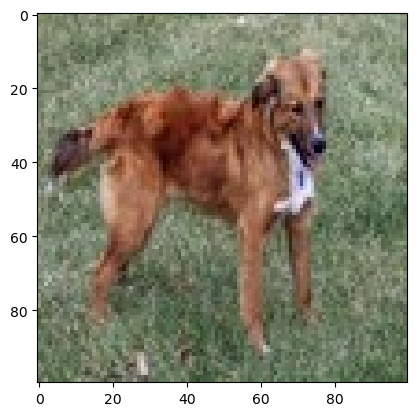

In [8]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [9]:
model = Sequential([
    Input(shape=(100, 100, 3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss = 'BinaryCrossentropy',optimizer = 'adam' ,metrics =['accuracy'])

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
]

history = model.fit(
    X_train, Y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 703ms/step - accuracy: 0.5950 - loss: 1.9197 - val_accuracy: 0.8225 - val_loss: 0.4657 - learning_rate: 0.0010
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 666ms/step - accuracy: 0.6494 - loss: 0.6524 - val_accuracy: 0.9900 - val_loss: 0.1425 - learning_rate: 0.0010
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 663ms/step - accuracy: 0.6950 - loss: 0.5739 - val_accuracy: 0.9750 - val_loss: 0.1352 - learning_rate: 0.0010
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 656ms/step - accuracy: 0.7212 - loss: 0.5257 - val_accuracy: 0.7425 - val_loss: 0.4269 - learning_rate: 0.0010
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 640ms/step - accuracy: 0.7581 - loss: 0.4875 - val_accuracy: 0.7525 - val_loss: 0.4275 - learning_rate: 0.0010
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 641ms/step - accuracy: 0.7962 - loss: 0.4352 - val_accuracy: 0.1325 - val_loss: 1.2419 - learning_rate: 0.0010
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 668ms/step - accuracy: 0.8388 - loss: 0.

In [16]:
print("Train Accuracy:", history.history['accuracy'][-1])
print("Val Accuracy:", history.history['val_accuracy'][-1])

Train Accuracy: 0.8650000095367432
Val Accuracy: 0.35749998688697815


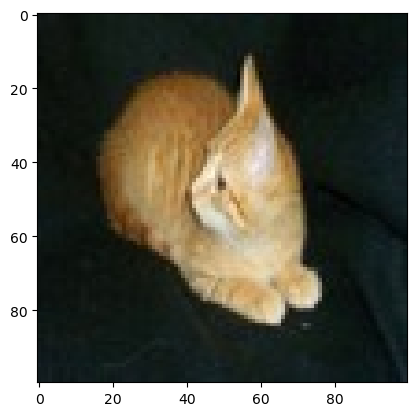

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Our model says it is a : cat


In [12]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'

print("Our model says it is a :",pred)

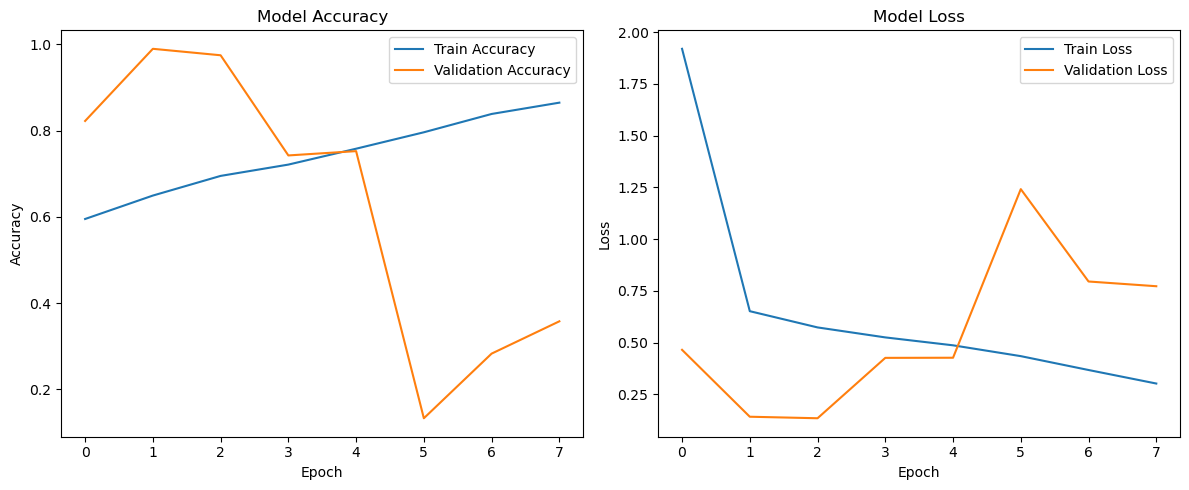

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history.get('val_loss', []), label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()